In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('C:/Users/nilas/OneDrive/Documents/IDS_Project/cap5771sp25-project/Data/merged_movies_dataset_full.csv')

C:\Users\nilas\AppData\Local\Temp\ipykernel_16516\2212076867.py:1: DtypeWarning: Columns (2,3,5,7,8,11,12,13,14,15,16,17,18,19,20,22,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/nilas/OneDrive/Documents/IDS_Project/cap5771sp25-project/Data/merged_movies_dataset_full.csv')


In [5]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 1261219
Columns: 45


In [7]:
# Print the column names
print("Column names:")
print(df.columns.tolist())


Column names:
['id', 'title', 'credits', 'recommendations', 'release_year', 'Director', 'AverageRating', 'Poster_Link', 'Certificate', 'IMDB_Rating', 'Meta_score', 'Star1', 'Star2', 'Star3', 'Star4', 'Writer', 'Director_of_Photography', 'Producers', 'Music_Composer', 'genres_list', 'Cast_list', 'overview_sentiment', 'all_combined_keywords', 'original_language', 'overview', 'popularity', 'production_companies', 'release_date', 'status', 'vote_average', 'poster_path', 'backdrop_path', 'keywords', 'tagline', 'budget', 'revenue', 'runtime', 'vote_count', 'original_title', 'production_countries', 'spoken_languages', 'genres', 'adult', 'homepage', 'imdb_id']


In [12]:
print(df)

              id                             title  \
0              2                             Ariel   
1              3               Shadows in Paradise   
2              5                        Four Rooms   
3              6                    Judgment Night   
4              8  Life in Loops (A Megacities RMX)   
...          ...                               ...   
1261214  1436762          Coming Home In A Bodybag   
1261215  1436763                     Sacra Lunaria   
1261216  1436764                  Konen med æggene   
1261217  1436765                 Kommunalvalg 1946   
1261218  1436766                   Et knudeproblem   

                                                   credits  \
0        Turo Pajala-Susanna Haavisto-Matti Pellonpää-E...   
1        Matti Pellonpää-Kati Outinen-Sakari Kuosmanen-...   
2        Tim Roth-Jennifer Beals-Antonio Banderas-Valer...   
3        Emilio Estevez-Cuba Gooding Jr.-Denis Leary-St...   
4                                        

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)


C:\Users\nilas\AppData\Local\Temp\ipykernel_16516\761090804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='release_decade', palette='viridis')


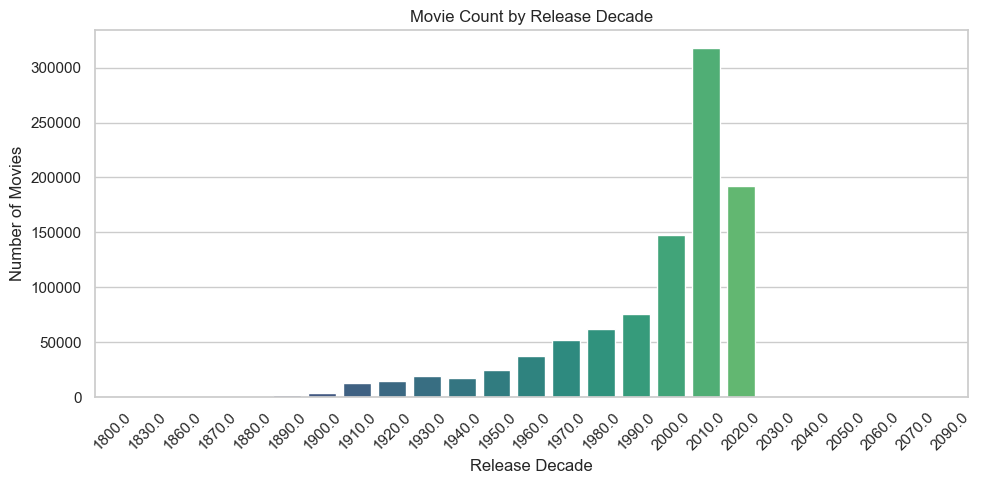

In [33]:
# 1. Release Decade
df['release_decade'] = (df['release_year'] // 10) * 10
# --- 1. Distribution of Release Decades --- visualizing for better understanding
sns.countplot(data=df, x='release_decade', palette='viridis')
plt.title('Movie Count by Release Decade')
plt.xlabel('Release Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

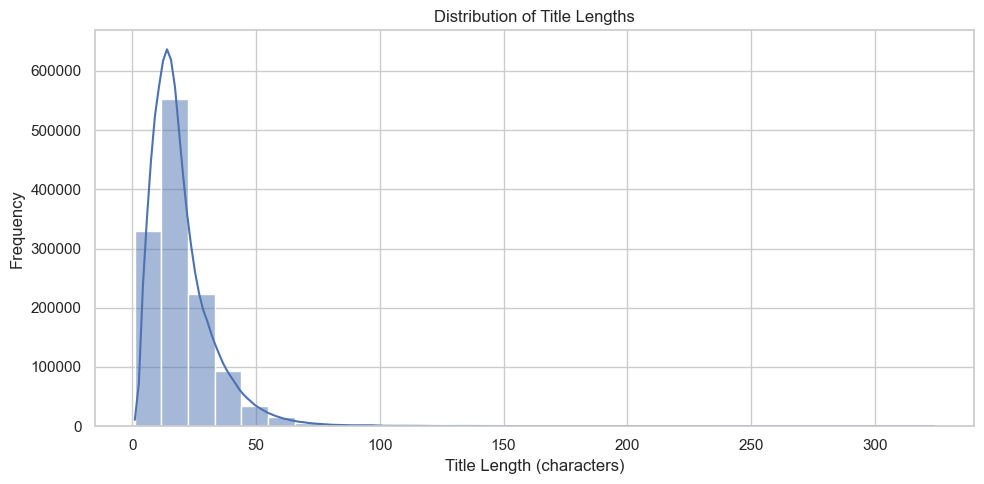

In [34]:
# 2. Title Length and Word Count
df['title_length'] = df['title'].astype(str).apply(len)
df['title_word_count'] = df['title'].astype(str).apply(lambda x: len(x.split()))
sns.histplot(df['title_length'], bins=30, kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

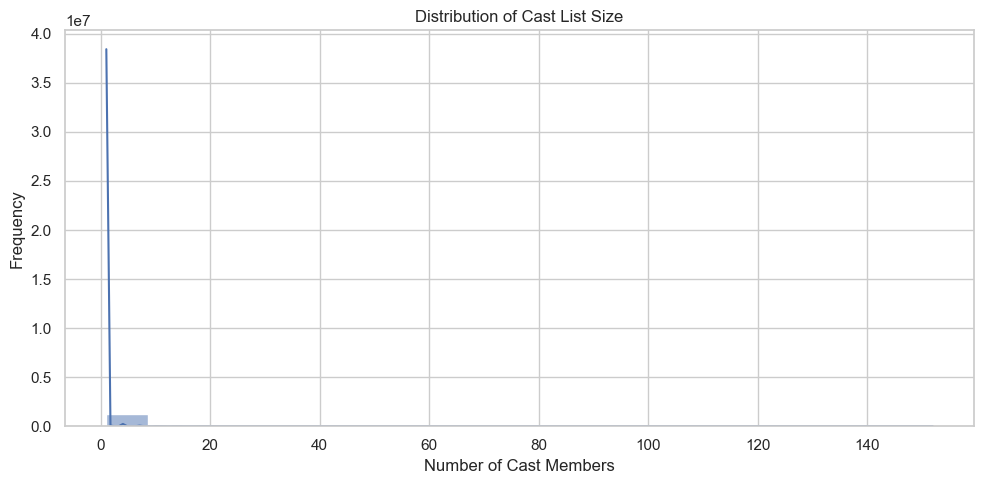

In [35]:
# 3. Number of Cast Members
df['num_cast_members'] = df['Cast_list'].astype(str).apply(lambda x: len(x.split('-')) if pd.notna(x) else 0)
sns.histplot(df['num_cast_members'], bins=20, kde=True)
plt.title('Distribution of Cast List Size')
plt.xlabel('Number of Cast Members')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [36]:
# 4. Director-Star1 Interaction (as string; optional: encode later)
df['director_star1'] = df['Director'].astype(str) + "_" + df['Star1'].astype(str)

C:\Users\nilas\AppData\Local\Temp\ipykernel_16516\1437754797.py:10: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(0, df['budget_to_revenue_ratio'].quantile(0.95))  # exclude extreme outliers


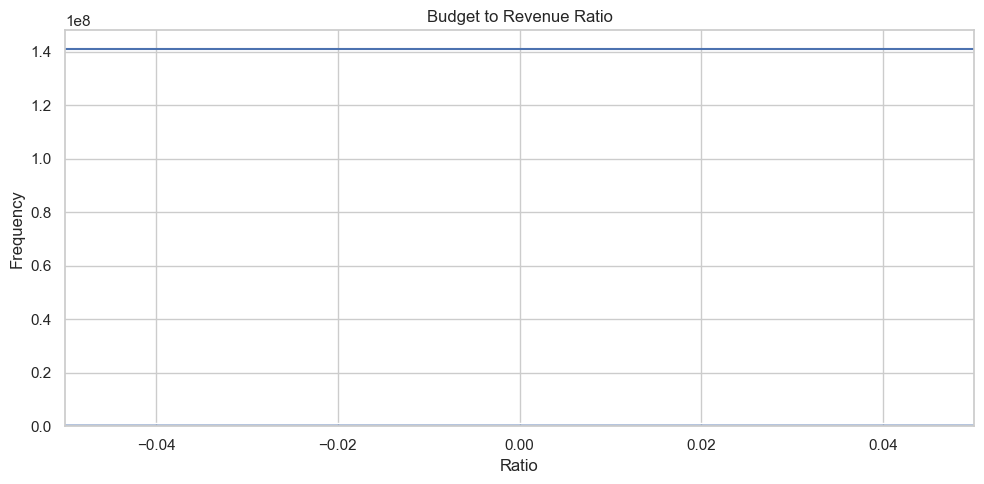

In [37]:
# 5. Budget to Revenue Ratio (avoid division by 0)
df['budget_to_revenue_ratio'] = df.apply(
    lambda row: row['budget'] / row['revenue'] if pd.notna(row['budget']) and pd.notna(row['revenue']) and row['revenue'] != 0 else 0,
    axis=1
)
sns.histplot(df['budget_to_revenue_ratio'], bins=50, kde=True)
plt.title('Budget to Revenue Ratio')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.xlim(0, df['budget_to_revenue_ratio'].quantile(0.95))  # exclude extreme outliers
plt.tight_layout()
plt.show()

C:\Users\nilas\AppData\Local\Temp\ipykernel_16516\1570792873.py:7: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(df['profit'].quantile(0.05), df['profit'].quantile(0.95))  # Trim outliers


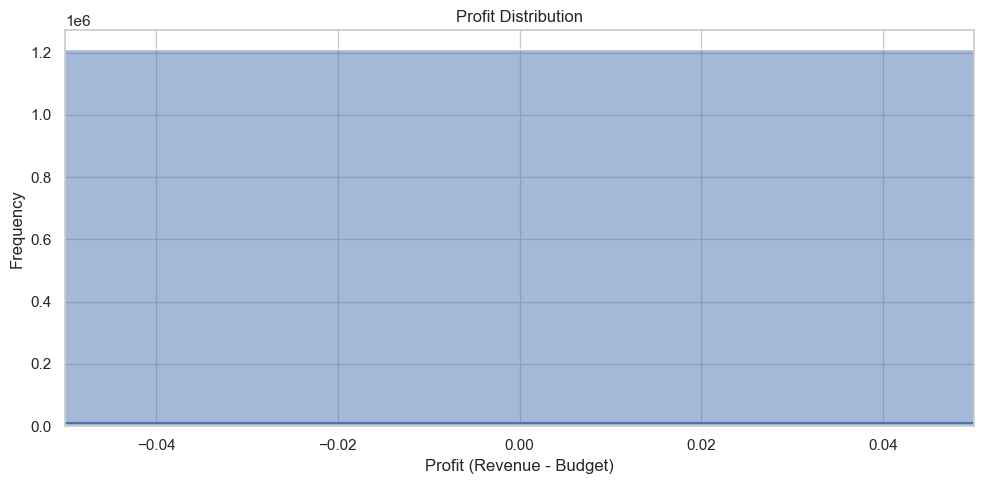

In [38]:
# 6. Profit
df['profit'] = df['revenue'] - df['budget']
sns.histplot(df['profit'], bins=50, kde=True)
plt.title('Profit Distribution')
plt.xlabel('Profit (Revenue - Budget)')
plt.ylabel('Frequency')
plt.xlim(df['profit'].quantile(0.05), df['profit'].quantile(0.95))  # Trim outliers
plt.tight_layout()
plt.show()

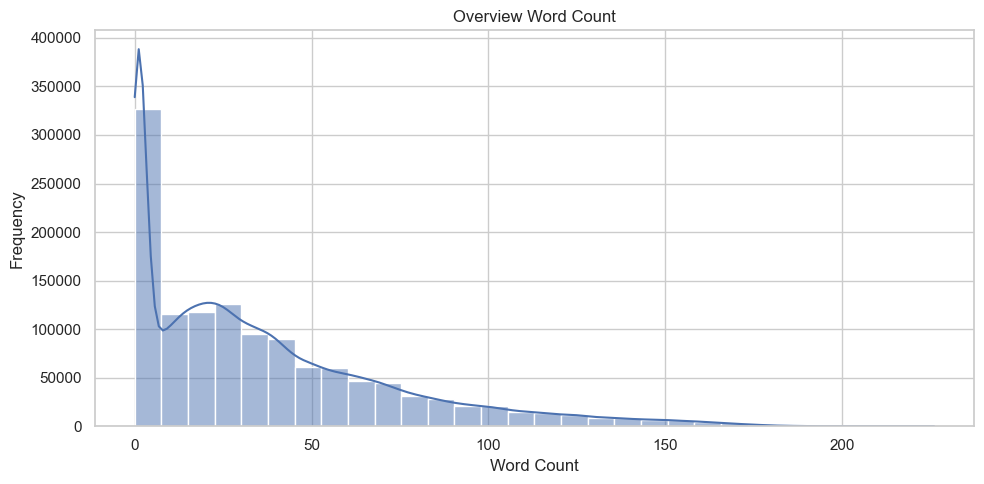

In [39]:
# 7. Overview Text Features
df['overview_length'] = df['overview'].astype(str).apply(len)
df['overview_word_count'] = df['overview'].astype(str).apply(lambda x: len(x.split()))
# ---  Overview Word Count ---
sns.histplot(df['overview_word_count'], bins=30, kde=True)
plt.title('Overview Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\Users\nilas\AppData\Local\Temp\ipykernel_16516\3753293634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num_genres', palette='Set2')


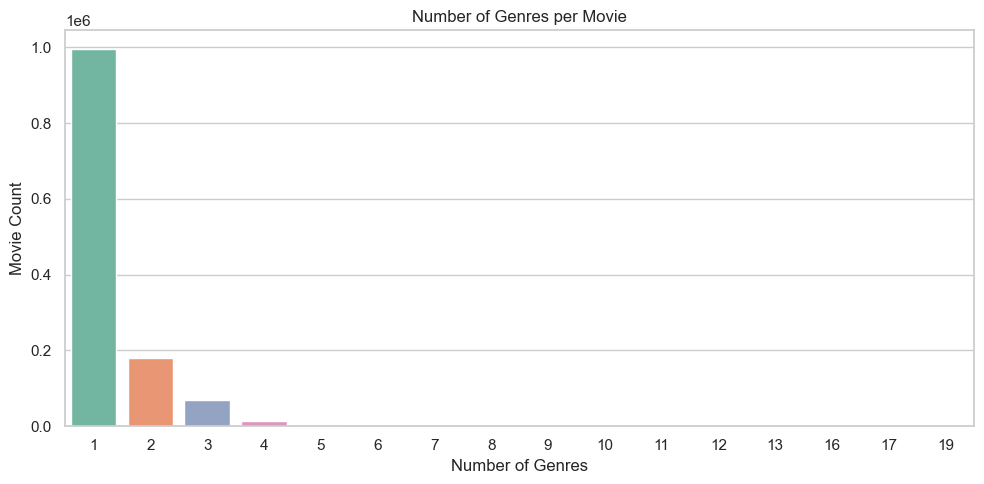

In [40]:
# 8. Genre Count
df['num_genres'] = df['genres_list'].astype(str).apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
sns.countplot(data=df, x='num_genres', palette='Set2')
plt.title('Number of Genres per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Movie Count')
plt.tight_layout()
plt.show()

C:\Users\nilas\AppData\Local\Temp\ipykernel_16516\2641057068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_category', palette='coolwarm')


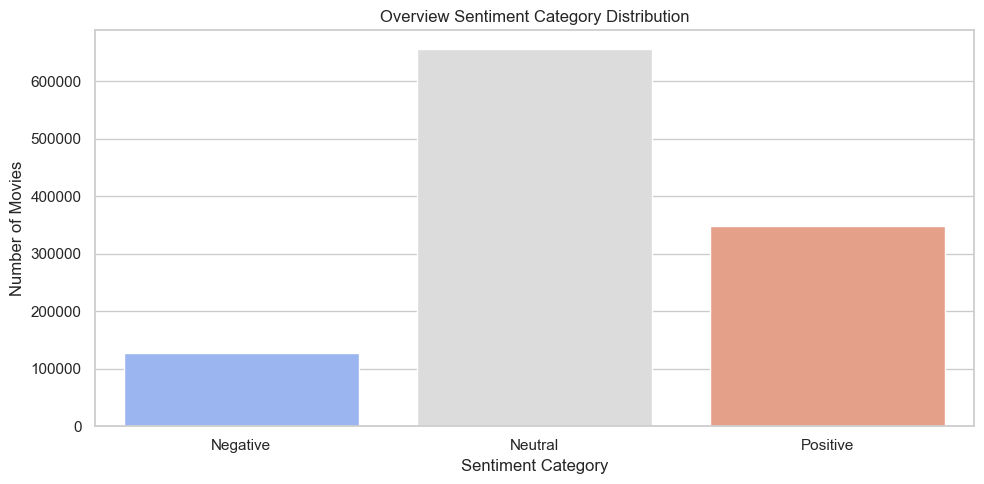

In [41]:

# 9. Sentiment Category
df['sentiment_category'] = pd.cut(
    df['overview_sentiment'],
    bins=[-1, -0.1, 0.1, 1],
    labels=['Negative', 'Neutral', 'Positive']
)
sns.countplot(data=df, x='sentiment_category', palette='coolwarm')
plt.title('Overview Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

C:\Users\nilas\AppData\Local\Temp\ipykernel_16516\4135576264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_sequel', palette='pastel')


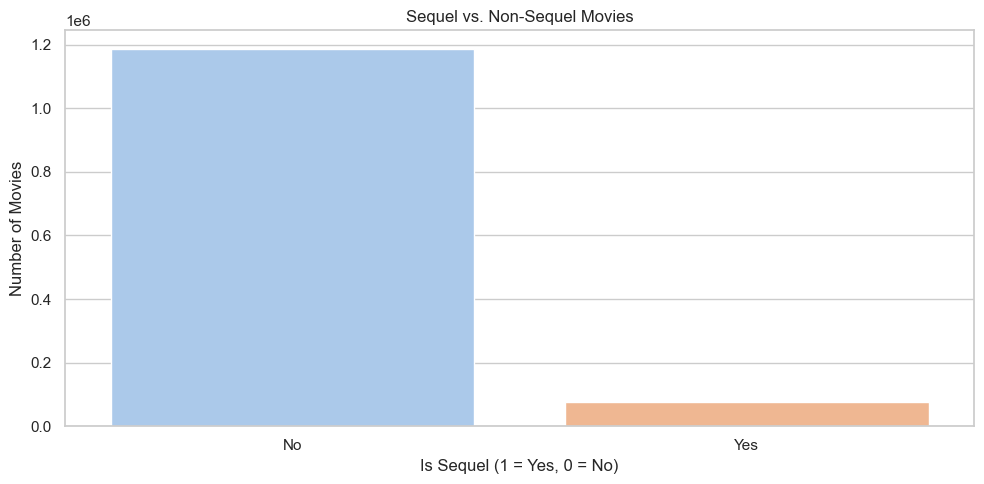

In [42]:
# 10. Is Sequel
df['is_sequel'] = df['title'].astype(str).apply(
    lambda x: 1 if any(word in x.lower() for word in ['2', 'ii', 'part', 'return', 'chapter', 'again', 'reloaded', 'revenge']) else 0
)
sns.countplot(data=df, x='is_sequel', palette='pastel')
plt.title('Sequel vs. Non-Sequel Movies')
plt.xlabel('Is Sequel (1 = Yes, 0 = No)')
plt.ylabel('Number of Movies')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

In [43]:
# Aggregation: Combined Star Popularity
# (Assuming vote_average = movie quality. Aggregating based on Star1–Star4)
df['star_power_score'] = df[['Star1', 'Star2', 'Star3', 'Star4']].astype(str).apply(lambda x: '-'.join(x), axis=1).apply(len)

In [44]:
#  Time-based Feature: Age of Movie (as of 2025)
df['movie_age'] = 2025 - df['release_year']


In [45]:
# Interaction Term: Budget × Popularity
df['budget_popularity_interaction'] = df['budget'] * df['popularity']

In my dataset categorical_cols = ['Certificate', 'original_language', 'status', 'release_month', 
                    'release_quarter', 'budget_category', 'sentiment_category', 
                    'genre_language_combo']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical features
# 'Certificate' and 'original_language' are categorical features
for col in ['Certificate', 'original_language']:
    if col in df.columns:
        df[col] = df[col].astype(str)  # Convert to string to avoid issues
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"Encoded '{col}' — Classes: {le.classes_}")
    else:
        print(f"Column '{col}' not found in DataFrame.")



Encoded 'Certificate' — Classes: ['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '2' '3' '4' '5' '6'
 '7' '8' '9']
Encoded 'original_language' — Classes: ['0' '1' '10' '100' '101' '102' '103' '104' '105' '106' '107' '108' '109'
 '11' '110' '111' '112' '113' '114' '115' '116' '117' '118' '119' '12'
 '120' '121' '122' '123' '124' '125' '126' '127' '128' '129' '13' '130'
 '131' '132' '133' '134' '135' '136' '137' '138' '139' '14' '140' '141'
 '142' '143' '144' '145' '146' '147' '148' '149' '15' '150' '151' '152'
 '153' '154' '155' '156' '157' '158' '159' '16' '160' '161' '162' '163'
 '164' '165' '166' '167' '168' '169' '17' '170' '171' '172' '173' '174'
 '18' '19' '2' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '3' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '4' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '5' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '6' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '7' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '

In [49]:
target = 'IMDB_Rating'
# Correlation matrix with target
numerical_df = df.select_dtypes(include='number')
correlation = numerical_df.corr()[target].sort_values(ascending=False)

print("Top correlated features with IMDB_Rating:")
print(correlation.drop(target).head(10))  # Exclude self-correlation


Top correlated features with IMDB_Rating:
star_power_score                 0.423114
Meta_score                       0.250244
AverageRating                    0.174890
vote_count                       0.162570
revenue                          0.111096
profit                           0.109907
budget                           0.085529
popularity                       0.023756
budget_popularity_interaction    0.020573
num_genres                       0.012864
Name: IMDB_Rating, dtype: float64


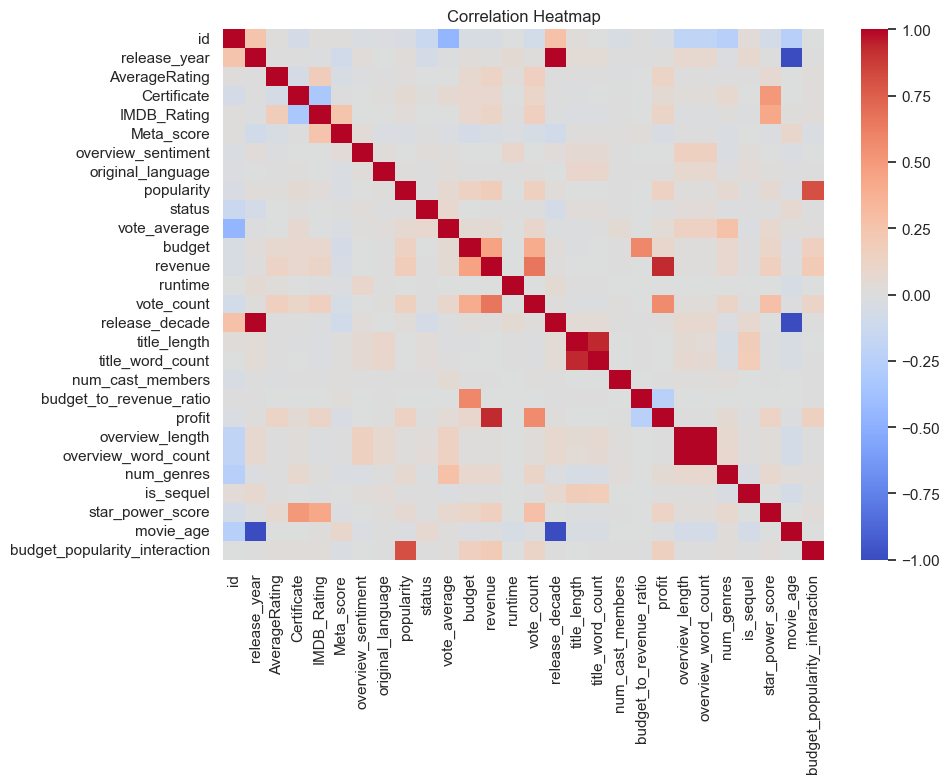

In [50]:
#visualizing the correlation matrix for easy interpretation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

# Example: convert IMDB_Rating to categories (low/medium/high)
df['rating_category'] = pd.cut(df['IMDB_Rating'], bins=[0, 5.5, 7.0, 10],
                               labels=['Low', 'Medium', 'High'])

# Encode category
label_enc = LabelEncoder()
y_cat = label_enc.fit_transform(df['rating_category'])

# label encoded features
X_cat = df[['Certificate', 'original_language', 'status']]

# Convert to numeric (ensure no string)
X_cat = X_cat.apply(LabelEncoder().fit_transform)

# Chi-square test
chi_scores = chi2(X_cat, y_cat)
chi_df = pd.DataFrame({'Feature': X_cat.columns, 'Chi2 Score': chi_scores[0], 'p-value': chi_scores[1]})
chi_df = chi_df.sort_values(by='Chi2 Score', ascending=False)

print("Chi-square scores:")
print(chi_df)


Chi-square scores:
             Feature     Chi2 Score        p-value
0        Certificate  108552.420617   0.000000e+00
1  original_language    1079.432997  1.054490e-233
2             status       3.364434   3.387749e-01


In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features (excluding the target)
X_numeric = df.select_dtypes(include='number').drop(columns=['IMDB_Rating'])

# Fill missing values with column means
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Output results
print(f"Original feature count: {X_numeric.shape[1]}")
print(f"Reduced feature count with PCA: {X_pca.shape[1]}")


Original feature count: 27
Reduced feature count with PCA: 19


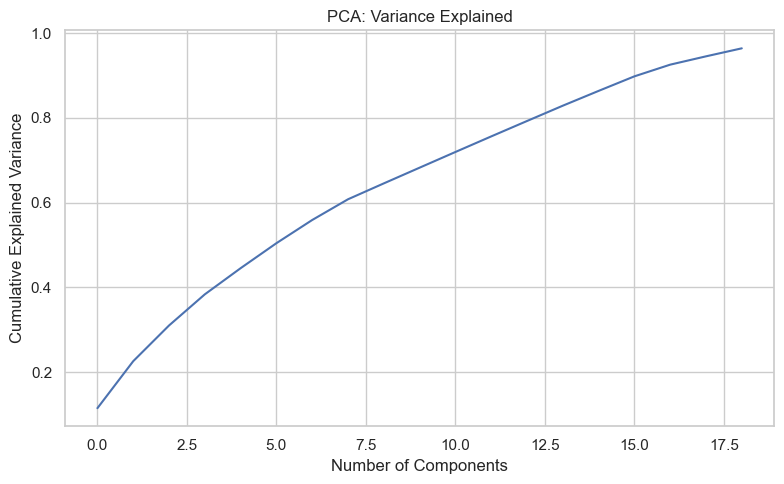

In [55]:
# Optional: plot explained variance
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [67]:
X_full = df.select_dtypes(include='number').copy()
y_full = df['IMDB_Rating']

# Drop missing target rows
valid_idx = y_full.notna()
X = X_full.loc[valid_idx]
y = y_full.loc[valid_idx]


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Impute
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [70]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [71]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
}

In [72]:
# Train & evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"\n{name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")


Linear Regression
RMSE: 0.0000
R² Score: 1.0000

Decision Tree
RMSE: 0.0038
R² Score: 1.0000

Random Forest
RMSE: 0.0040
R² Score: 1.0000

Support Vector Machine
RMSE: 0.1096
R² Score: 0.9869

Neural Network (MLP)
RMSE: 0.0403
R² Score: 0.9982


In [73]:
# List numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

# Peek at the data types and unique value counts
for col in numeric_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")


Numeric columns: ['id', 'release_year', 'AverageRating', 'Certificate', 'IMDB_Rating', 'Meta_score', 'overview_sentiment', 'original_language', 'popularity', 'status', 'vote_average', 'budget', 'revenue', 'runtime', 'vote_count', 'release_decade', 'title_length', 'title_word_count', 'num_cast_members', 'budget_to_revenue_ratio', 'profit', 'overview_length', 'overview_word_count', 'num_genres', 'is_sequel', 'star_power_score', 'movie_age', 'budget_popularity_interaction']
id: 1188909 unique values
release_year: 163 unique values
AverageRating: 68 unique values
Certificate: 19 unique values
IMDB_Rating: 73 unique values
Meta_score: 61 unique values
overview_sentiment: 70469 unique values
original_language: 175 unique values
popularity: 21701 unique values
status: 6 unique values
vote_average: 3494 unique values
budget: 5827 unique values
revenue: 13992 unique values
runtime: 775 unique values
vote_count: 3547 unique values
release_decade: 25 unique values
title_length: 258 unique values


 Since we have worked on the target variable IMDB_Rating (a continuous numeric value), we currently working on a regression problem.

BUT — metrics like accuracy, precision, recall, F1-score, ROC curve are for classification problems.
We convert it into classification 

In [75]:
# Convert continuous ratings to categories
df['rating_class'] = pd.cut(df['IMDB_Rating'],
                            bins=[0, 5.5, 7.0, 10],
                            labels=['Low', 'Medium', 'High'])


In [76]:
from sklearn.model_selection import train_test_split

# Use numeric features
X = df.select_dtypes(include='number').drop(columns=['IMDB_Rating'])
y = df['rating_class']

# Drop missing targets
valid_idx = y.notna()
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.6643609495362365
Precision: 0.7117149184378497
Recall: 0.6643609495362365
F1 Score: 0.6132375280828974

Classification Report:

              precision    recall  f1-score   support

        High       0.81      0.48      0.60      2055
         Low       0.80      0.07      0.13       926
      Medium       0.63      0.94      0.75      3380

    accuracy                           0.66      6361
   macro avg       0.75      0.50      0.50      6361
weighted avg       0.71      0.66      0.61      6361



c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


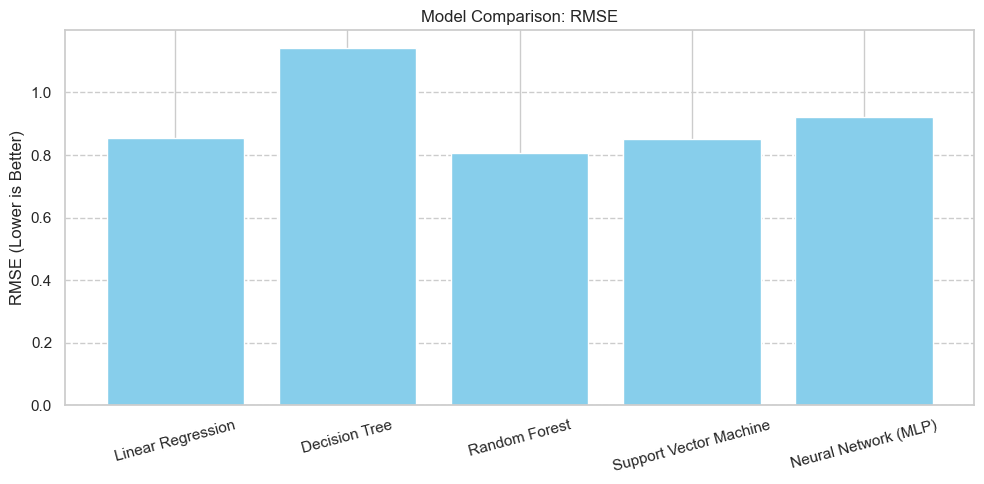

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select numeric features and target
X = df.select_dtypes(include='number').drop(columns=['IMDB_Rating'])
y = df['IMDB_Rating'].dropna()

# Align features to y
X = X.loc[y.index]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
}

# Store results
model_names = []
rmse_scores = []
r2_scores = []

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    model_names.append(name)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# --- Plot RMSE ---
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.title('Model Comparison: RMSE')
plt.ylabel('RMSE (Lower is Better)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



In [84]:
# Convert y_test to binary: 1 if 'High', else 0
y_test_binary = (y_test == 'High').astype(int)

# Get probabilities for the 'High' class
high_class_index = list(clf.classes_).index('High')
y_probs_binary = clf.predict_proba(X_test)[:, high_class_index]


c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\nilas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


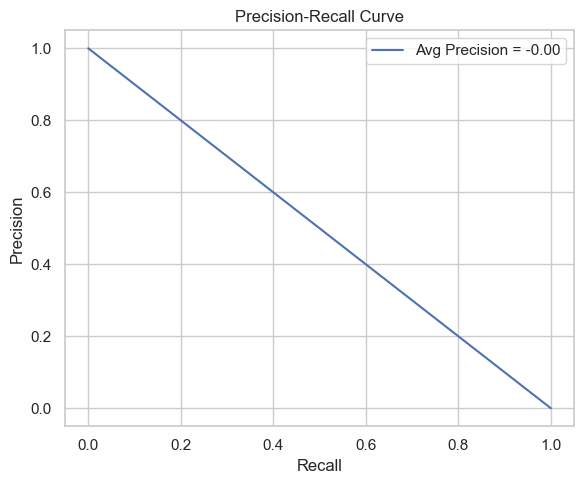

In [85]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision-recall points
precision, recall, _ = precision_recall_curve(y_test_binary, y_probs_binary)
ap_score = average_precision_score(y_test_binary, y_probs_binary)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'Avg Precision = {ap_score:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
